In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
from astroquery.mast import Observations
import lightkurve
import celerite
from celerite import terms
from scipy.optimize import minimize
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile

#### Testing out some of the TESS sector 14 data (which overlaps the Kepler field) with eleanor
http://adina.feinste.in/eleanor/getting_started/tutorial.html

In [3]:
import eleanor as el

In [4]:
gj1243 = el.Source(tic=273589987, sector=14, tc=True)

Inflating...


In [5]:
data = el.TargetData(gj1243, do_psf=True, do_pca = False) 

100%|██████████| 1241/1241 [00:15<00:00, 82.66it/s]


Text(0.5, 0, 'Time')

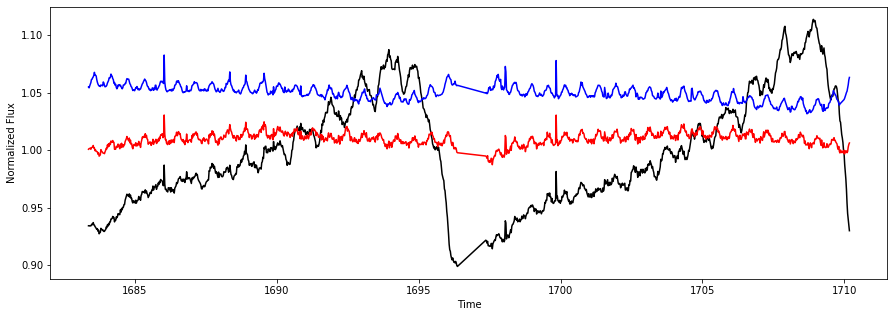

In [6]:
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.median(data.raw_flux[q])-0.01, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.median(data.corr_flux[q]) + 0.01, 'r')
plt.plot(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q]) + 0.05, 'b')

plt.ylabel('Normalized Flux')
plt.xlabel('Time')


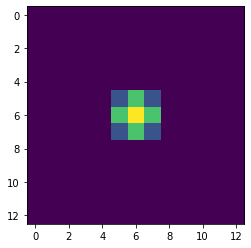

In [7]:
plt.imshow(data.aperture)

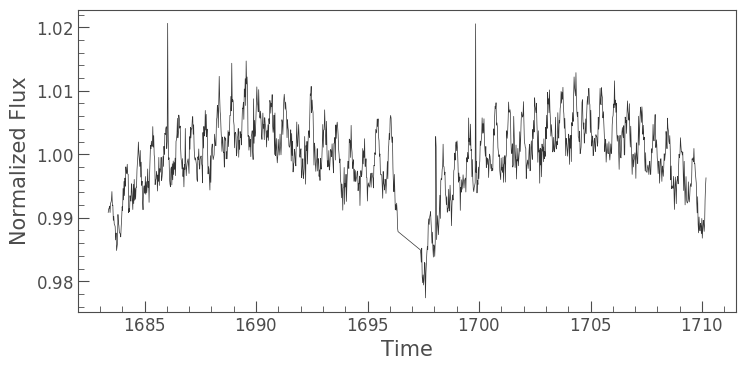

In [8]:
from lightkurve.lightcurve import LightCurve as LC

lk = LC(data.time[q], data.corr_flux[q]).plot()

/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/eleanor/visualize.py:214: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


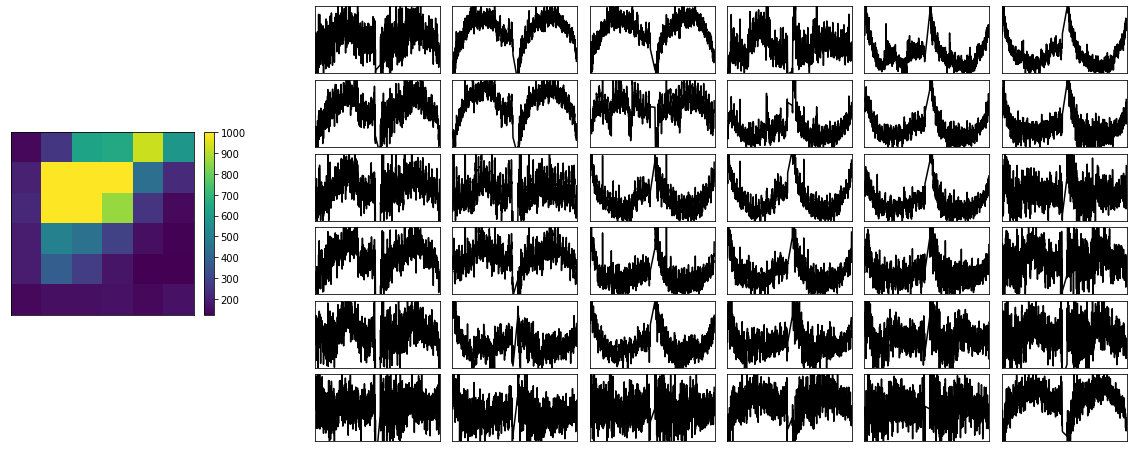

In [9]:
vis = el.Visualize(data)
vis.pixel_by_pixel(rowrange=[5,11], colrange=[5,11])

In [10]:
corr_flux = el.TargetData.corrected_flux(data, flux=data.raw_flux)

Text(0.5, 0, 'Time')

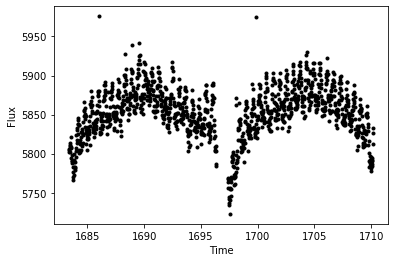

In [11]:
plt.plot(data.time[q], corr_flux[q], 'k.')

plt.ylabel('Flux')
plt.xlabel('Time')

In [12]:
el.TargetData.pca(data, flux=corr_flux, modes=4)
#wait for lightcurve data to be released for this to work

HTTPError: HTTP Error 404: Not Found

In [13]:
#PSF modeling with a gaussian profile
el.TargetData.psf_lightcurve(data, model='gaussian')

100%|██████████| 1241/1241 [00:14<00:00, 82.76it/s]


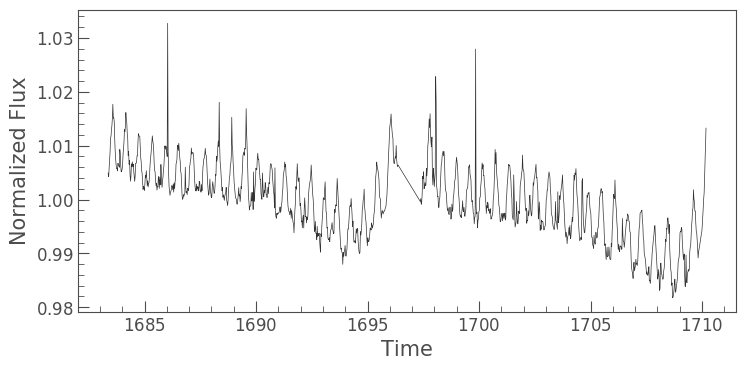

In [14]:
lk_psf = LC(data.time[q], data.psf_flux[q]).plot()

#### Now to comparing it to Kepler data

In [15]:
target = '9726699'
gj1243_collection = search_lightcurvefile(target,cadence='short').download_all()

In [16]:
gj1243lc = gj1243_collection[0].PDCSAP_FLUX

for q in range(1,len(gj1243_collection)):
    try:
        gj1243lc = gj1243lc.append(gj1243_collection[q].PDCSAP_FLUX)
    except:
            print(q)

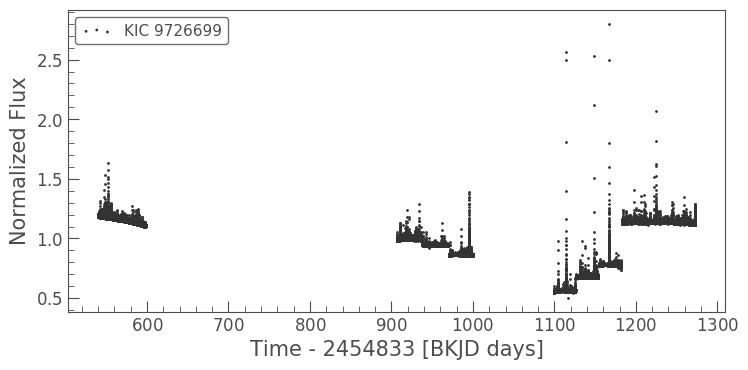

In [17]:
gj1243lc.scatter()

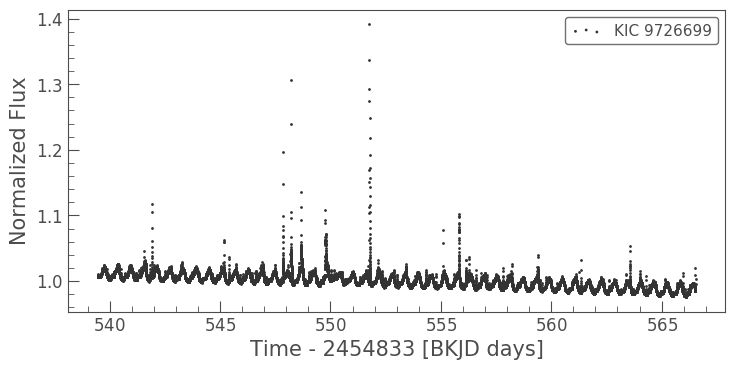

In [18]:
gj1243_collection[0].PDCSAP_FLUX.scatter()

In [19]:
import exoplanet as xo